In [1]:
%matplotlib inline
from __future__ import print_function

import sys
import time
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

from hipopy import Event, LorentzVector, Particle, hipo_reader, detector

SECTORS = 7
BEAM_E = 2.2
MASS_ELEC = 0.000511
MASS_P = 0.93827
c_special_units = 29.9792458

def vertex_time(sc_time, sc_pathlength, relatavistic_beta):
    return sc_time - sc_pathlength / (relatavistic_beta * c_special_units)



In [2]:
def process(filenames):
    events = 0
    num = 0
    start = time.time()

    dt = []
    p = []
    for f in filenames:
        reader = hipo_reader(f)
        data = Event(reader)
        for event in data:
            events += 1
            num += 1
            vertex = vertex_time(event.getTime(detector['FTOF1B'], 0), event.getPath(detector['FTOF1B'], 0), 1.0);
            for x in range(1,len(event)):
                if event.particle[x].P <= 0:
                    continue
                beta = 1.0 / np.sqrt(1.0 + (MASS_P / event.particle[x].P) * (MASS_P / event.particle[x].P));
                dt_P = vertex - vertex_time(event.getTime(detector['FTOF1B'], x), event.getPath(detector['FTOF1B'], x), beta);
                dt.append(dt_P)
                p.append(event.particle[x].P)
        
    end = time.time()
    print((end - start), "Sec")
    print((events / (end - start)), "Hz")
    
    return dt, p

In [3]:
dt, p = process(['/Users/tylern/Data/hipo/skim4_3063.hipo'])

52.4520778656 Sec
17037.570986 Hz


/usr/local/lib/python2.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


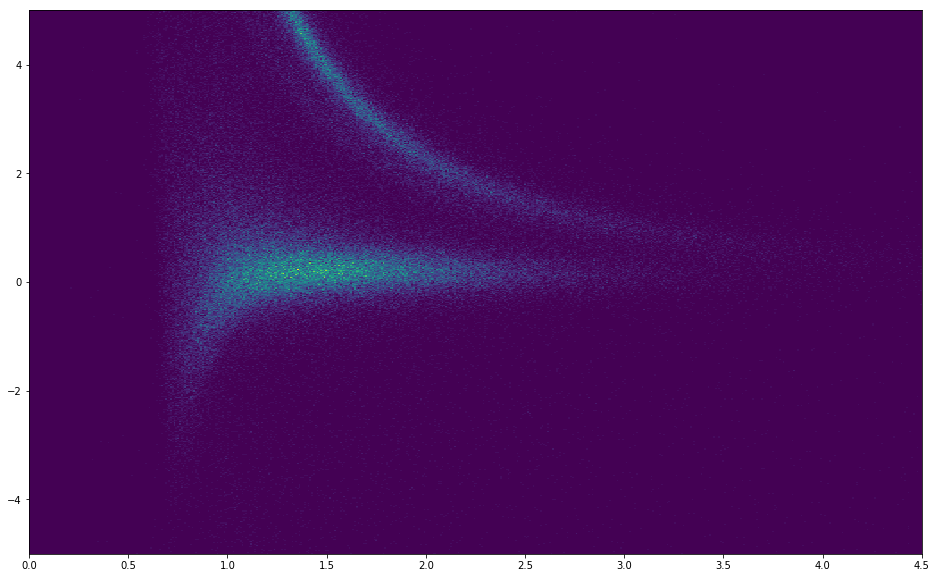

In [4]:
fig, axs = plt.subplots(1, sharex='col', figsize=(16, 10))
#p = p[~np.isnan(p)]
#dt = dt[~np.isnan(dt)]
axs.hist2d(p, dt, bins=500, range=((0.0, 4.5), (-5.0, 5.0)))
fig.show()